In [2]:
import pandas as pd
import numpy as np

In [3]:
import scipy.stats as stat
import matplotlib.pyplot as plt

In [4]:
import scipy.optimize as optimize
import scipy.special as sp

In [50]:
import random as rand
import time
import math
import copy as deepcopy
import copy

In [6]:
df = pd.read_csv('../Data_All_180906/CSV/Forecasting AI Progress v1.0.csv')

In [7]:
np.random.seed(12345678)

In [8]:
df = df.iloc[:,9:]

In [9]:
df.columns = ['name','surname','employer','job','Q1',
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13']

In [10]:
dfx = pd.read_csv('../Data_All_180906/CSV/altdata.csv',keep_default_na=False)
dfx = pd.read_csv('../data_b.csv',keep_default_na=False)
df4 = dfx.iloc[:,7:]
df4.columns = ['role','demo','name','surname','employer','job','Q1',\
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13','expert']
experts = df4.expert
demo = df4.demo
roles = df4.role
demo = np.asarray(demo)
roles = np.asarray(roles)
print(demo.shape)
print(roles.shape)
role = np.zeros(demo.shape[0]+1)
region = np.zeros(demo.shape[0]+1)
gender = np.zeros(demo.shape[0]+1)
experts = np.asarray(experts)
expert = np.zeros(demo.shape[0]+1)
for i in range(0,demo.shape[0]-1):
    try:
        vals = demo[i+1].split(',')
        #print (vals)
        if vals[0] == 'EU':
            region[i+1] = 0
        elif vals[0] == 'A':
            region[i+1] = 1
        elif vals[0] == 'NA':
            region[i+1] = 2
        elif vals[0] == 'O':
            region[i+1] = 3
        elif vals[0] == 'X':
            region[i+1] = -1
        elif vals[0] == 'SA':
            region[i+1] = 3
        elif vals[0] == 'AR':
            region[i+1] = 3
        else:
            region[i+1] = -1
        try:
            if vals[1] == 'f':
                gender[i+1] = 0
            else:
                gender[i+1] = 1
        except:
            gender[i+1] = 1
    except:
        region[i+1] = -1
        gender[i+1] = -1
    if roles[i+1] == 'phd': #grad student
        role[i+1] = 0
    elif roles[i+1] == 'prof': #academic
        role[i+1] = 1
    elif roles[i+1] == 'r': #industry research
        role[i+1] = 2
    elif roles[i+1] == 'eng': #industry engineer
        role[i+1] = 3
    elif roles[i+1] == 'exec': #industry executive
        role[i+1] = 4
    elif roles[i+1] == 'f': #founder
        role[i+1] = 5
    else: role[i+1] = -1   
    if experts[i+1] == 'x' or experts[i+1] == 'na':
        expert[i+1] = -1
    else:
        expert[i+1] = 1
expert_df = pd.DataFrame(expert)
df['expert'] = expert_df
region_df = pd.DataFrame(region)
gender_df = pd.DataFrame(gender)
role_df = pd.DataFrame(role)
df['region'] = region_df
df['gender'] = gender_df
df['role'] = role_df

(230,)
(230,)


In [11]:
df = df.dropna(subset=['name','surname','employer','job'])

### Naive calibration A 

In [12]:
df['weight'] = 1.
df2 = df.iloc[1:]
df2.Q1 = pd.to_numeric(df2.Q1)
mask = df2.Q1 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q1 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q2 = pd.to_numeric(df2.Q2)
mask = df2.Q2 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q2 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q3 = pd.to_numeric(df2.Q3)
mask = df2.Q3 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q3 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q4 = pd.to_numeric(df2.Q4)
mask = df2.Q4 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q4 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Naive calibration B 

In [13]:
df3 = df.iloc[1:]
df3.Q1 = pd.to_numeric(df3.Q1)
mask = df3.Q1 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q1 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q2 = pd.to_numeric(df3.Q2)
mask = df3.Q2 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q2 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q3 = pd.to_numeric(df3.Q3)
mask = df3.Q3 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q3 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q4 = pd.to_numeric(df3.Q4)
mask = df3.Q4 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q4 == 100
df3.loc[mask, 'weight'] = 0.

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
q1 = df.Q1
q2 = df.Q2
q3 = df.Q3
q4 = df.Q4
q5 = df[['Q5a','Q5b','Q5c']]
q6 = df[['Q6a','Q6b','Q6c']]
q7 = df[['Q7a','Q7b','Q7c']]
q8 = df[['Q8a','Q8b','Q8c']]
q9 = df[['Q9a','Q9b','Q9c']]
q10 = df[['Q10a','Q10b','Q10c']]
q11 = df.Q11
q12 = df.Q12
q13 = df.Q13

In [15]:
q1 = q1.dropna()
q2 = q2.dropna()
q3 = q3.dropna()
q4 = q4.dropna()
q5 = q5.dropna()
q6 = q6.dropna()
q7 = q7.dropna()
q8 = q8.dropna()
q9 = q9.dropna()
q10 = q10.dropna()
q11 = q11.dropna()
q12 = q12.dropna()
q13 = q13.dropna()

In [16]:
q8 = q8.iloc[1:]
q8 = q8.astype(float)
q8.head()

,Q8a,Q8b,Q8c
1,2024.0,2027.0,2030.0
3,2040.0,2060.0,2080.0
4,9.0,13.0,25.0
5,10.0,18.0,25.0
6,20.0,32.0,75.0


In [17]:
mask = q8.Q8a > 2000
mask2 = q8.Q8a < 3000
mask = mask*mask2
q8.loc[mask, 'Q8a'] = q8.Q8a - 2018
q8.loc[mask, 'Q8b'] = q8.Q8b - 2018
q8.loc[mask, 'Q8c'] = q8.Q8c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [18]:
q8b = df2[['Q8a','Q8b','Q8c','weight']]
q8b = q8b.dropna()
q8b = q8b.astype(float)
mask = q8b.Q8a > 2000
mask2 = q8b.Q8a < 3000
mask = mask*mask2
q8b.loc[mask, 'Q8a'] = q8b.Q8a - 2018
q8b.loc[mask, 'Q8b'] = q8b.Q8b - 2018
q8b.loc[mask, 'Q8c'] = q8b.Q8c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [19]:
q8c = df3[['Q8a','Q8b','Q8c','weight']]
q8c = q8c.dropna()
q8c = q8c.astype(float)
mask = q8c.Q8a > 2000
mask2 = q8c.Q8a < 3000
mask = mask*mask2
q8c.loc[mask, 'Q8a'] = q8c.Q8a - 2018
q8c.loc[mask, 'Q8b'] = q8c.Q8b - 2018
q8c.loc[mask, 'Q8c'] = q8c.Q8c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [20]:
q8d = df[['Q8a','Q8b','Q8c','gender','region','role']]
q8d = q8d.iloc[1:]
q8d = q8d.dropna()
q8d = q8d.astype(float)
mask = q8d.Q8a > 2000
mask2 = q8d.Q8a < 3000
mask = mask*mask2
q8d.loc[mask, 'Q8a'] = q8d.Q8a - 2018
q8d.loc[mask, 'Q8b'] = q8d.Q8b - 2018
q8d.loc[mask, 'Q8c'] = q8d.Q8c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


### Fitting to Gamma CDF

In [21]:
#Manually handling extreme responses
extremeResponses = [14,56,100,102,120,134,164,222]

In [22]:
for i in extremeResponses:
    q8.loc[i]['Q8a'] = 1000
    q8.loc[i]['Q8b'] = 10000
    q8.loc[i]['Q8c'] = 100000

In [23]:
q8 = q8[q8.Q8c >= 0.000001]
q8 = q8[q8.Q8c-q8.Q8b >= 0.000001]
q8 = q8[q8.Q8c-q8.Q8a >= 0.000001]
q8 = q8[q8.Q8a <= 5000]
q8 = q8[q8.Q8b <= 5000]
q8 = q8[q8.Q8c <= 5000]
q8.shape[0]

146

In [24]:
for i in extremeResponses:
    q8b.loc[i]['Q8a'] = 1000
    q8b.loc[i]['Q8b'] = 10000
    q8b.loc[i]['Q8c'] = 100000
q8b = q8b[q8b.Q8c >= 0.000001]
q8b = q8b[q8b.Q8c-q8b.Q8b >= 0.000001]
q8b = q8b[q8b.Q8c-q8b.Q8a >= 0.000001]
q8b = q8b[q8b.Q8a <= 5000]
q8b = q8b[q8b.Q8b <= 5000]
q8b = q8b[q8b.Q8c <= 5000]
q8b.shape[0]

146

In [25]:
for i in extremeResponses:
    q8c.loc[i]['Q8a'] = 1000
    q8c.loc[i]['Q8b'] = 10000
    q8c.loc[i]['Q8c'] = 100000
q8c = q8c[q8c.Q8c >= 0.000001]
q8c = q8c[q8c.Q8c-q8c.Q8b >= 0.000001]
q8c = q8c[q8c.Q8c-q8c.Q8a >= 0.000001]
q8c = q8c[q8c.Q8a <= 5000]
q8c = q8c[q8c.Q8b <= 5000]
q8c = q8c[q8c.Q8c <= 5000]
q8c.shape[0]

146

In [26]:
for i in extremeResponses:
    q8d.loc[i]['Q8a'] = 1000
    q8d.loc[i]['Q8b'] = 10000
    q8d.loc[i]['Q8c'] = 100000
q8d = q8d[q8d.Q8c >= 0.000001]
q8d = q8d[q8d.Q8c-q8d.Q8b >= 0.000001]
q8d = q8d[q8d.Q8c-q8d.Q8a >= 0.000001]
q8d = q8d[q8d.Q8a <= 5000]
q8d = q8d[q8d.Q8b <= 5000]
q8d = q8d[q8d.Q8c <= 5000]
q8d.shape[0]

146

In [27]:
q8d.Q8a.median()

15.0

In [28]:
q8d.Q8b.median()

32.5

In [29]:
q8d.Q8c.median()

60.0

In [30]:
q8d.Q8a.mean()

27.897260273972602

In [31]:
q8d.Q8b.mean()

60.57534246575342

In [32]:
q8d.Q8c.mean()

146.3835616438356

In [33]:
ydata = [0.1,0.5,0.9]

In [34]:
xdata = np.asarray(q8)

In [35]:
def ff(params,xdata,ydata):
    return xdata-params[1]*sp.gammaincinv(params[0],ydata)

In [36]:
x0f = np.array([9.,1.])

In [37]:
paramsf = optimize.least_squares(ff, x0f, args=(xdata[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datz = np.zeros(xdata.shape[0]*3)
dataxx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)  
for i in range(1000):
    if dataxx[i] > 5000.:
        dataxx[i] = 5000.
datz[0] = stat.gamma.ppf(.1, paramsf.x[0], 0., paramsf.x[1])
datz[1] = stat.gamma.ppf(.5, paramsf.x[0], 0., paramsf.x[1])
datz[2] = stat.gamma.ppf(.9, paramsf.x[0], 0., paramsf.x[1])
datayy = stat.gamma.cdf(dataxx,paramsf.x[0], 0., scale=paramsf.x[1])
for i in range(1,q8.shape[0]):
    paramsf = optimize.least_squares(ff, x0f, args=(xdata[i], ydata),max_nfev=1000,
                                tr_solver='exact')
    datz[i*3] = stat.gamma.ppf(.1, paramsf.x[0], 0., paramsf.x[1])
    datz[i*3+1] = stat.gamma.ppf(.5, paramsf.x[0], 0., paramsf.x[1])
    datz[i*3+2] = stat.gamma.ppf(.9, paramsf.x[0], 0., paramsf.x[1])
    dataxx = np.concatenate((dataxx,stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)),axis=0)
    datayy = np.concatenate((datayy,stat.gamma.cdf(dataxx[i*1000:],paramsf.x[0], 0., scale=paramsf.x[1])),axis=0)

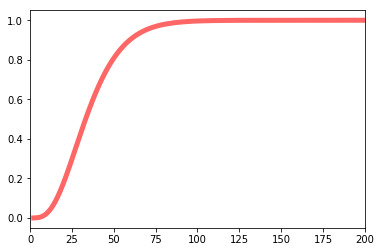

16.071809152201958
33.15813025442105
59.54422968437332


In [38]:
m10 = np.median(datz[::3])
m50 = np.median(datz[1::3])
m90 = np.median(datz[2::3])
paramsz = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                tr_solver='exact')
datzx = stat.gamma.rvs(paramsz.x[0], 0., scale=paramsz.x[1], size=1000)  
for i in range(1000):
    if datzx[i] > 5000.:
        datzx[i] = 5000.
datzx.sort()
datzx[-1] = 200.
datzy = stat.gamma.cdf(datzx,paramsz.x[0], 0., scale=paramsz.x[1])
plt.plot(datzx, stat.gamma.cdf(datzx, paramsz.x[0], 0., paramsz.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,200)
plt.show()
print(stat.gamma.ppf(.1, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.5, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.9, paramsz.x[0], 0., paramsz.x[1]))

In [39]:
outx = np.zeros((datzx.shape[0]))
outy = np.zeros((datzy.shape[0]))
outx = pd.DataFrame(datzx)
outy = pd.DataFrame(datzy)
outy.to_csv('no8-y.csv')
outx.to_csv('no8-x.csv')

## Conference Effect

In [40]:
q8c['conf'] = q8c.index
q8c.conf[q8c.index > 57] = 0
q8c.conf[q8c.index <= 57] = 1

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [41]:
xhlai = q8c[q8c.index <= 57]
xhlai = np.asarray(xhlai[['Q8a','Q8b','Q8c']])
xijcai = q8c[q8c.index > 57]
xijcai = np.asarray(xijcai[['Q8a','Q8b','Q8c']])

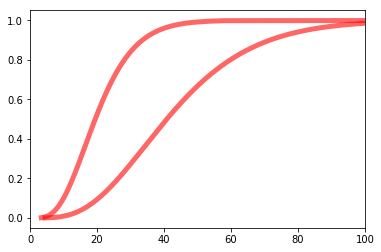

In [42]:
params1 = optimize.least_squares(ff, x0f, args=(xijcai[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datx1 = stat.gamma.rvs(params1.x[0], 0., scale=params1.x[1], size=1000)  
datij = np.zeros(xijcai.shape[0]*3)
for i in range(1000):
    if datx1[i] > 5000.:
        datx1[i] = 5000.
datij[0] = stat.gamma.ppf(.1, params1.x[0], 0., params1.x[1])
datij[1] = stat.gamma.ppf(.5, params1.x[0], 0., params1.x[1])
datij[2] = stat.gamma.ppf(.9, params1.x[0], 0., params1.x[1])
daty1 = stat.gamma.cdf(datx1,params1.x[0], 0., scale=params1.x[1])
for i in range(1,xijcai.shape[0]):
    params1 = optimize.least_squares(ff, x0f, args=(xijcai[i], ydata),max_nfev=10000,
                                tr_solver='exact')
    datx1 = np.concatenate((datx1,stat.gamma.rvs(params1.x[0], 0., scale=params1.x[1], size=1000)),axis=0)
    daty1 = np.concatenate((daty1,stat.gamma.cdf(datx1[i*1000:],params1.x[0], 0., scale=params1.x[1])),axis=0)
    datij[i*3] = stat.gamma.ppf(.1, params1.x[0], 0., params1.x[1])
    datij[i*3+1] = stat.gamma.ppf(.5, params1.x[0], 0., params1.x[1])
    datij[i*3+2] = stat.gamma.ppf(.9, params1.x[0], 0., params1.x[1])

paramsxx1 = optimize.least_squares(ff, x0f, args=(datx1[:], daty1[:]),max_nfev=10000,
                                tr_solver='exact')
datx1.sort()    

params2 = optimize.least_squares(ff, x0f, args=(xhlai[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datx2 = stat.gamma.rvs(params2.x[0], 0., scale=params2.x[1], size=1000)
dathl = np.zeros(xhlai.shape[0]*3)
for i in range(1000):
    if datx2[i] > 5000.:
        datx2[i] = 5000.
dathl[0] = stat.gamma.ppf(.1, params2.x[0], 0., params2.x[1])
dathl[1] = stat.gamma.ppf(.5, params2.x[0], 0., params2.x[1])
dathl[2] = stat.gamma.ppf(.9, params2.x[0], 0., params2.x[1])
daty2 = stat.gamma.cdf(datx2,params2.x[0], 0., scale=params2.x[1])
for i in range(1,xhlai.shape[0]):
    params2 = optimize.least_squares(ff, x0f, args=(xhlai[i], ydata),max_nfev=10000,
                                    tr_solver='exact')
    datx2 = np.concatenate((datx2,stat.gamma.rvs(params2.x[0], 0., scale=params2.x[1], size=1000)),axis=0)
    daty2 = np.concatenate((daty2,stat.gamma.cdf(datx2[i*1000:],params2.x[0], 0., scale=params2.x[1])),axis=0)    
    dathl[i*3] = stat.gamma.ppf(.1, params2.x[0], 0., params2.x[1])
    dathl[i*3+1] = stat.gamma.ppf(.5, params2.x[0], 0., params2.x[1])
    dathl[i*3+2] = stat.gamma.ppf(.9, params2.x[0], 0., params2.x[1])
paramsxx2 = optimize.least_squares(ff, x0f, args=(datx2[:], daty2[:]),max_nfev=10000,
                                tr_solver='exact')    
datx2.sort()
m10ij = np.median(datij[::3])
m50ij = np.median(datij[1::3])
m90ij = np.median(datij[2::3])
paramsij = optimize.least_squares(ff, x0f, args=([m10ij,m50ij,m90ij], ydata),max_nfev=10000,
                                #loss='arctan',
                                tr_solver='exact')
datij = stat.gamma.rvs(paramsij.x[0], 0., scale=paramsij.x[1], size=1000)  
for i in range(1000):
    if datij[i] > 5000.:
        datij[i] = 5000.
datij.sort()
datij[-1] = 200.
datiy = stat.gamma.cdf(datij,paramsij.x[0], 0., scale=paramsij.x[1])
plt.plot(datij, stat.gamma.cdf(datij, paramsij.x[0], 0., paramsij.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,200)
m10hl = np.median(dathl[::3])
m50hl = np.median(dathl[1::3])
m90hl = np.median(dathl[2::3])
paramshl = optimize.least_squares(ff, x0f, args=([m10hl,m50hl,m90hl], ydata),max_nfev=10000,
                                tr_solver='exact')
dathl = stat.gamma.rvs(paramshl.x[0], 0., scale=paramshl.x[1], size=1000)  
for i in range(1000):
    if dathl[i] > 5000.:
        dathl[i] = 5000.
dathl.sort()
dathl[-1] = 200.
dathy = stat.gamma.cdf(dathl,paramshl.x[0], 0., scale=paramshl.x[1])
plt.plot(dathl, stat.gamma.cdf(dathl, paramshl.x[0], 0., paramshl.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,100)
plt.show()

## BOOTSTRAP

In [43]:
def gbootstrap(xdata):
    bstrap = np.zeros(xdata.shape)
    for i in range(xdata.shape[0]):
        randidx = rand.randrange(xdata.shape[0])
        dat = xdata[randidx,:]
        bstrap[i,:] = dat
    return bstrap

In [44]:
def compute_ci(intrp, confidence = 0.95):
    avg = np.zeros((intrp.shape[1]),dtype = 'float32')
    lb   = np.zeros((intrp.shape[1]),dtype = 'float32')
    up   = np.zeros((intrp.shape[1]),dtype = 'float32')
    pz = (1.0-confidence)/2.0
    print(intrp.shape)
    for i in range(intrp.shape[1]):
        vec = intrp[:,i]
        vec.sort()
        avg[i] = np.average(vec)
        lb[i] = vec[math.floor(pz*len(vec))]
        up[i] = vec[math.floor((1.0-pz)*len(vec))]
    return avg,lb,up

In [45]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 146
for i in range(nbstraps):
    bstrap = gbootstrap(xdata)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')    

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


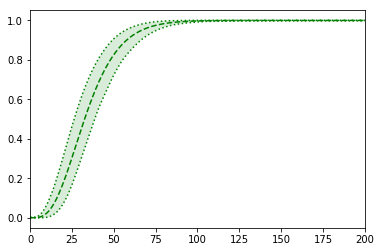

In [46]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.95)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals") # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':') 
plt.xlim(0,200)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.15)
plt.show()

In [47]:
out = np.zeros((intrp_.shape[0],4))
for i in range(intrp_.shape[0]):
    out[i,0] = intrp_[i]
    out[i,1] = avg[i]
    out[i,2] = lb[i]
    out[i,3] = ub[i]
out = pd.DataFrame(out)
out.to_csv('no8.csv')

# Conference Bootstrap

In [51]:
xhlai = q8c[q8c.index <= 57]
xhlai = np.asarray(xhlai[['Q8a','Q8b','Q8c']])
xijcai = q8c[q8c.index > 57]
xijcai = np.asarray(xijcai[['Q8a','Q8b','Q8c']])

In [52]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xhlai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


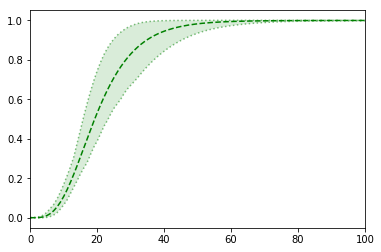

In [53]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.15)
plt.show()
ihlai = copy.deepcopy(intrp_)

In [54]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xijcai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


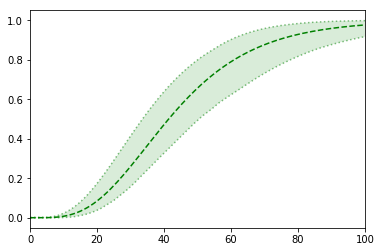

In [55]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg9, lb9, ub9 = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg9, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb9, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub9, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb9, ub9, facecolor=clr, alpha=0.15)
plt.show()
iijcai = copy.deepcopy(intrp_)

In [58]:
plt.clf()
ax = plt.gca()
clr = 'darkcyan'
plt.plot(ihlai, avg, color=clr, ls='--', label="90% Broad HLAI")
plt.plot(ihlai, lb, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(ihlai, ub, color=clr, ls=':',alpha=0.75) # , label = "ub")
ax.fill_between(ihlai, lb, ub, facecolor=clr, alpha=0.25)
clr = 'grey'
plt.plot(iijcai, avg9, color=clr, ls='--', label="90% Broad IJCAI")
plt.plot(iijcai, lb9, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(iijcai, ub9, color=clr, ls=':',alpha=0.65) # , label = "ub")
ax.fill_between(iijcai, lb9, ub9, facecolor=clr, alpha=0.25)

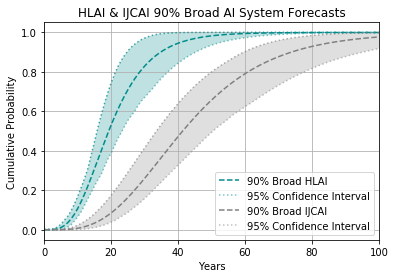

In [59]:
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('HLAI & IJCAI 90% Broad AI System Forecasts')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(0,100)
plt.savefig('Q8-hlai-ijcai-cis.png')
plt.show()